<a href="https://colab.research.google.com/github/Padmini-RK/Yelp-Business-Data-Analysis/blob/Yelp-report/Yelp_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import gc # garbage collector
import numpy as np # linear algebra
from collections import Counter # for counting commong words
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # visualization
plt.style.use('fivethirtyeight') # use ggplot ploting style
import seaborn as sns # visualization 
from wordcloud import WordCloud, STOPWORDS # this module is for making wordcloud in python
import re # regular expression
import string # for finding punctuation in text
import nltk # preprocessing text
from textblob import TextBlob
# import ploty for visualization
import plotly
import plotly.offline as py # make offline 
py.init_notebook_mode(connected=True)
import plotly.tools as tls
import plotly.graph_objs as go
from plotly.graph_objs import *
import plotly.tools as tls
import plotly.figure_factory as fig_fact
import plotly.io as pio
pio.renderers.default = 'notebook'
# remove war
import warnings
warnings.filterwarnings('ignore')
# this will allow ploting inside the notebook
%matplotlib inline
import matplotlib.pyplot as plt
import base64
from io import BytesIO

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# import yelp_business.csv using pandas read_csv method
df_yelp_business = pd.read_csv('/content/drive/MyDrive/yelp_academic_dataset_business.csv')

In [5]:
df_yelp_business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories,hours,attributes_ByAppointmentOnly,attributes_BusinessAcceptsCreditCards,hours_Monday,hours_Tuesday,hours_Wednesday,hours_Thursday,hours_Friday,hours_Saturday,attributes_BikeParking,attributes_RestaurantsPriceRange2,attributes_CoatCheck,attributes_RestaurantsTakeOut,attributes_RestaurantsDelivery,attributes_Caters,attributes_WiFi,attributes_BusinessParking,attributes_WheelchairAccessible,attributes_HappyHour,attributes_OutdoorSeating,attributes_HasTV,attributes_RestaurantsReservations,attributes_DogsAllowed,hours_Sunday,attributes_Alcohol,attributes_GoodForKids,attributes_RestaurantsAttire,attributes_Ambience,attributes_RestaurantsTableService,attributes_RestaurantsGoodForGroups,attributes_DriveThru,attributes,attributes_NoiseLevel,attributes_GoodForMeal,attributes_BusinessAcceptsBitcoin,attributes_Smoking,attributes_Music,attributes_GoodForDancing,attributes_AcceptsInsurance,attributes_BestNights,attributes_BYOB,attributes_Corkage,attributes_BYOBCorkage,attributes_HairSpecializesIn,attributes_Open24Hours,attributes_RestaurantsCounterService,attributes_AgesAllowed,attributes_DietaryRestrictions
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,"Doctors, Traditional Chinese Medicine, Naturop...",NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,"Shipping Centers, Local Services, Notaries, Ma...",NaN,NaN,True,0:0-0:0,8:0-18:30,8:0-18:30,8:0-18:30,8:0-18:30,8:0-14:0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"Department Stores, Shopping, Fashion, Home & G...",NaN,False,True,8:0-22:0,8:0-22:0,8:0-22:0,8:0-22:0,8:0-23:0,8:0-23:0,True,2,False,False,False,False,u'no',"{'garage': False, 'street': False, 'validated'...",True,False,False,False,False,False,8:0-22:0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",NaN,False,False,7:0-20:0,7:0-20:0,7:0-20:0,7:0-20:0,7:0-21:0,7:0-21:0,True,1,NaN,True,False,True,u'free',"{'garage': False, 'street': True, 'validated':...",NaN,NaN,False,NaN,NaN,NaN,7:0-21:0,u'none',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"Brewpubs, Breweries, Food",NaN,NaN,True,NaN,NaN,14:0-22:0,16:0-22:0,12:0-22:0,12:0-22:0,True,NaN,NaN,True,NaN,False,NaN,"{'garage': None, 'street': None, 'validated': ...",True,NaN,NaN,NaN,NaN,NaN,12:0-18:0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# categories column has many categories at once. Let's split the categories column and store each category in it's own column
df_category_split = df_yelp_business['categories'].str.split(',', expand=True)[[0,1,2]]
# rename the new columns
df_category_split.columns = ['category_1', 'category_2', 'category_3']
df_yelp_business = pd.concat([df_yelp_business, df_category_split], axis=1)
# now drop the actual categories column
df_yelp_business = df_yelp_business.drop(['categories'], axis=1)
# print the head of the dataset
df_yelp_business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,hours,attributes_ByAppointmentOnly,attributes_BusinessAcceptsCreditCards,hours_Monday,hours_Tuesday,hours_Wednesday,hours_Thursday,hours_Friday,hours_Saturday,attributes_BikeParking,attributes_RestaurantsPriceRange2,attributes_CoatCheck,attributes_RestaurantsTakeOut,attributes_RestaurantsDelivery,attributes_Caters,attributes_WiFi,attributes_BusinessParking,attributes_WheelchairAccessible,attributes_HappyHour,attributes_OutdoorSeating,attributes_HasTV,attributes_RestaurantsReservations,attributes_DogsAllowed,hours_Sunday,attributes_Alcohol,attributes_GoodForKids,attributes_RestaurantsAttire,attributes_Ambience,attributes_RestaurantsTableService,attributes_RestaurantsGoodForGroups,attributes_DriveThru,attributes,attributes_NoiseLevel,attributes_GoodForMeal,attributes_BusinessAcceptsBitcoin,attributes_Smoking,attributes_Music,attributes_GoodForDancing,attributes_AcceptsInsurance,attributes_BestNights,attributes_BYOB,attributes_Corkage,attributes_BYOBCorkage,attributes_HairSpecializesIn,attributes_Open24Hours,attributes_RestaurantsCounterService,attributes_AgesAllowed,attributes_DietaryRestrictions,category_1,category_2,category_3
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Doctors,Traditional Chinese Medicine,Naturopathic/Holistic
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,NaN,NaN,True,0:0-0:0,8:0-18:30,8:0-18:30,8:0-18:30,8:0-18:30,8:0-14:0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Shipping Centers,Local Services,Notaries
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,NaN,False,True,8:0-22:0,8:0-22:0,8:0-22:0,8:0-22:0,8:0-23:0,8:0-23:0,True,2,False,False,False,False,u'no',"{'garage': False, 'street': False, 'validated'...",True,False,False,False,False,False,8:0-22:0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Department Stores,Shopping,Fashion
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,NaN,False,False,7:0-20:0,7:0-20:0,7:0-20:0,7:0-20:0,7:0-21:0,7:0-21:0,True,1,NaN,True,False,True,u'free',"{'garage': False, 'street': True, 'validated':...",NaN,NaN,False,NaN,NaN,NaN,7:0-21:0,u'none',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Restaurants,Food,Bubble Tea
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,NaN,NaN,True,NaN,NaN,14:0-22:0,16:0-22:0,12:0-22:0,12:0-22:0,True,NaN,NaN,True,NaN,False,NaN,"{'garage': None, 'street': None, 'validated': ...",True,NaN,NaN,NaN,NaN,NaN,12:0-18:0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Brewpubs,Breweries,Food


2. Find nearby Restaurants in map

In [7]:
# let's filter our dataset.
# we'll use Restaurants category
df_yelp_business_restaurants = df_yelp_business.loc[(df_yelp_business['category_1'] == 'Restaurants') | (df_yelp_business['category_2'] == 'Restaurants') | (df_yelp_business['category_3'] == 'Restaurants')]

In [8]:
df_yelp_business_restaurants.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,hours,attributes_ByAppointmentOnly,attributes_BusinessAcceptsCreditCards,hours_Monday,hours_Tuesday,hours_Wednesday,hours_Thursday,hours_Friday,hours_Saturday,attributes_BikeParking,attributes_RestaurantsPriceRange2,attributes_CoatCheck,attributes_RestaurantsTakeOut,attributes_RestaurantsDelivery,attributes_Caters,attributes_WiFi,attributes_BusinessParking,attributes_WheelchairAccessible,attributes_HappyHour,attributes_OutdoorSeating,attributes_HasTV,attributes_RestaurantsReservations,attributes_DogsAllowed,hours_Sunday,attributes_Alcohol,attributes_GoodForKids,attributes_RestaurantsAttire,attributes_Ambience,attributes_RestaurantsTableService,attributes_RestaurantsGoodForGroups,attributes_DriveThru,attributes,attributes_NoiseLevel,attributes_GoodForMeal,attributes_BusinessAcceptsBitcoin,attributes_Smoking,attributes_Music,attributes_GoodForDancing,attributes_AcceptsInsurance,attributes_BestNights,attributes_BYOB,attributes_Corkage,attributes_BYOBCorkage,attributes_HairSpecializesIn,attributes_Open24Hours,attributes_RestaurantsCounterService,attributes_AgesAllowed,attributes_DietaryRestrictions,category_1,category_2,category_3
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,NaN,False,False,7:0-20:0,7:0-20:0,7:0-20:0,7:0-20:0,7:0-21:0,7:0-21:0,True,1,NaN,True,False,True,u'free',"{'garage': False, 'street': True, 'validated':...",NaN,NaN,False,NaN,NaN,NaN,7:0-21:0,u'none',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Restaurants,Food,Bubble Tea
23,9OG5YkX1g2GReZM0AskizA,Romano's Macaroni Grill,5505 S Virginia St,Reno,NV,89502,39.476117,-119.789339,2.5,339,1,NaN,NaN,True,11:0-22:0,11:0-22:0,10:0-22:0,11:0-20:0,11:0-21:0,12:0-21:0,True,2,NaN,True,True,True,u'free',"{'garage': False, 'street': False, 'validated'...",NaN,True,True,True,True,False,11:0-21:0,'full_bar',True,'casual',"{u'divey': False, u'hipster': False, u'casual'...",True,True,NaN,NaN,u'average',"{'dessert': None, 'latenight': False, 'lunch':...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Restaurants,Italian,None
27,tMkwHmWFUEXrC9ZduonpTg,The Green Pheasant,215 1st Ave S,Nashville,TN,37201,36.159886,-86.773197,4.0,161,0,NaN,NaN,True,NaN,NaN,16:0-22:0,16:0-22:0,16:0-23:0,16:0-23:0,False,NaN,NaN,None,None,True,u'free',"{'garage': True, 'street': False, 'validated':...",True,True,False,False,True,False,NaN,u'full_bar',False,u'casual',"{'touristy': False, 'hipster': False, 'romanti...",True,True,NaN,NaN,u'average',"{'dessert': None, 'latenight': None, 'lunch': ...",False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Restaurants,Japanese,Seafood
36,2xVsWBNFwZOxIOdd9Mwnww,Cheeseburger In Paradise,116 N Pottstown Pike,Exton,PA,19341,40.029962,-75.630607,2.5,20,0,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,True,False,NaN,u'free',"{'garage': False, 'street': False, 'validated'...",NaN,True,True,True,NaN,NaN,NaN,u'full_bar',True,u'casual',"{'romantic': False, 'intimate': False, 'touris...",NaN,True,NaN,NaN,u'average',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Restaurants,Burgers,None
41,ljxNT9p0y7YMPx0fcNBGig,Tony's Restaurant & 3rd Street Cafe,312 Piasa St,Alton,IL,62002,38.896563,-90.186203,3.0,94,1,NaN,NaN,True,0:0-0:0,16:0-21:30,16:0-21:30,16:0-21:30,16:0-22:0,16:0-22:0,True,2,NaN,True,False,True,'free',"{'garage': False, 'street': True, 'validated':...",True,True,True,True,True,NaN,16:0-21:30,u'full_bar',True,u'casual',"{'touristy': False, 'hipster': False, 'romanti...",True,True,NaN,NaN,u'average',"{'dessert': False, 'latenight': False, 'lunch'...",False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Restaurants,Specialty Food,Steakhouses


In [9]:
# take only name and stars for map hover description
fff = df_yelp_business_restaurants[['name', 'stars']].astype(str).apply(lambda x: '. Rating: '.join(x), axis=1).tolist()

In [10]:
# mapbox access token. Go to Mapbox.com and sign up and get your access_token. Don't use mine please. 
mapbox_access_token = 'pk.eyJ1IjoiYWtzaGF5cGF0aWwxNCIsImEiOiJjbGd3eTNzeXkwZzh6M2ZuM3Q1amVtemF5In0.mQMapkGAR2H3IAaLnbljow'

# define our data for ploting on mapbox
data = Data([
    Scattermapbox(
        lat=df_yelp_business_restaurants.latitude.tolist(),
        lon=df_yelp_business_restaurants.longitude.tolist(),
        mode='markers',
        # add 'bar' as a marker icon. so it's look beautiful 
        marker=Marker(
            symbol='bar',
            size=9
        ),
        text=fff,
    )
])
# dfine our map layout
layout = Layout(
    # add title
    title='Zoom to your location and find your desire restaurants',
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        # add our access token
        accesstoken=mapbox_access_token,
        bearing=0,
        # add center location to our map
        center=dict(
            lat=39.4440302947,
            lon=-98.9565517008
        ),
        # use style light
        style='light',
        pitch=0,
        # zoom label to 3
        zoom=3
    ),
)

fig = go.Figure(data=data, layout=layout)

# Display the map in the notebook using Plotly's built-in renderer
figure = fig.show(renderer='colab')

Top rated restaurants

Yelp is a collection of different business in different areas. In Yelp the most popular business is Restaurants business. Yelp has a huge collection of restaurants. It's quite impossible to plot that thousands of business ratings. So I take top 20 most occurrences restaurants and calculate their mean of stars review's polarity and plot them and see which is most popular restaurants.

In [11]:
df_yelp_review = pd.read_csv('/content/drive/MyDrive/yelp_academic_dataset_review.csv')
df_yelp_tip = pd.read_csv('/content/drive/MyDrive/yelp_academic_dataset_tip.csv')

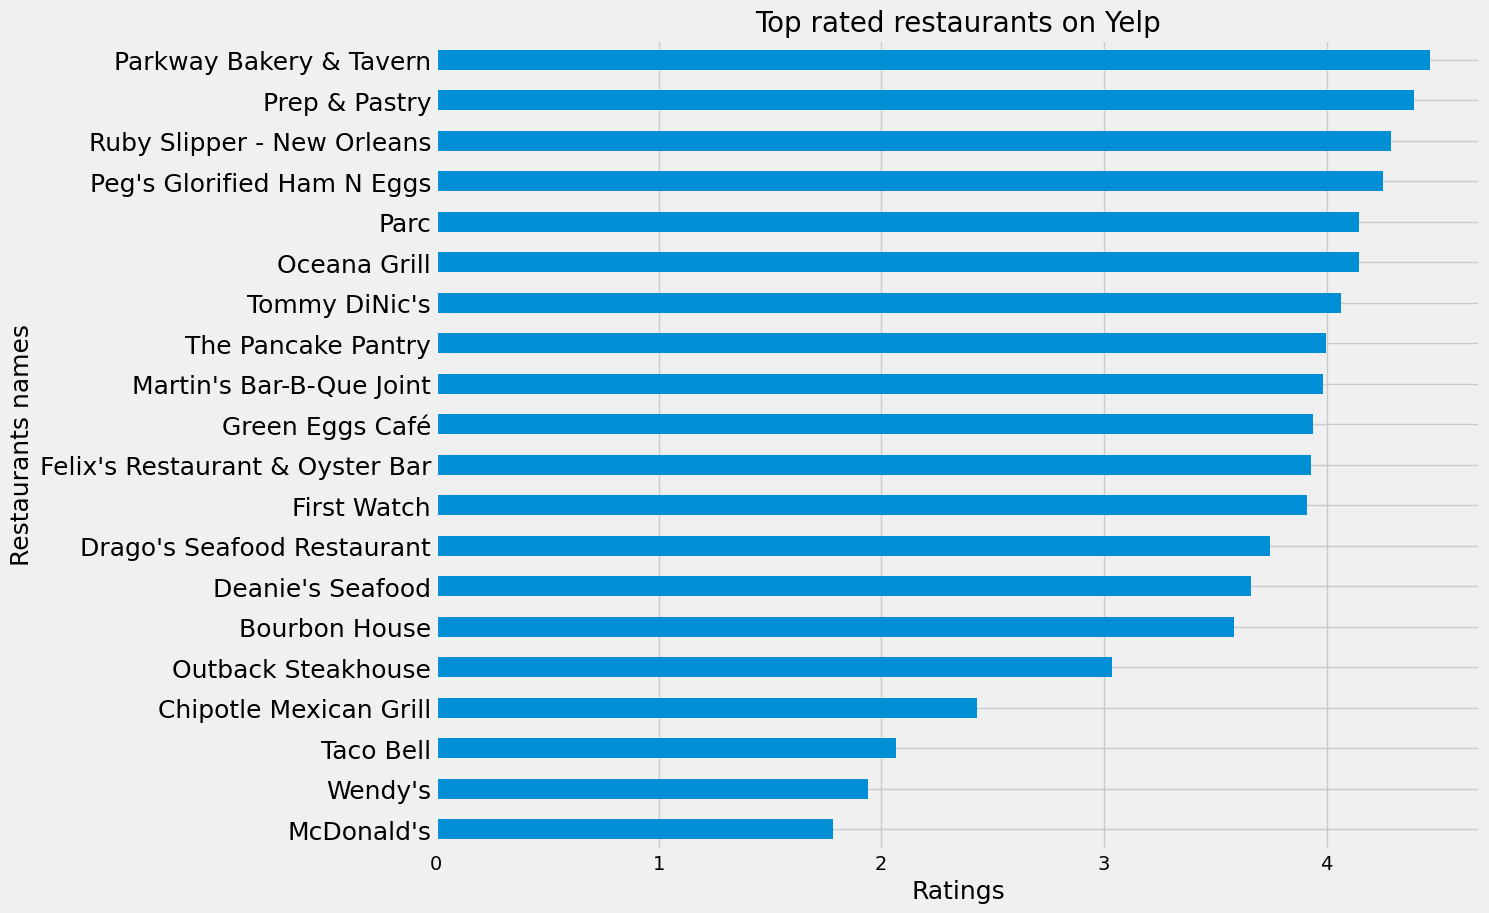

In [12]:
# So I take the df_yelp_review business_id and match with df_yelp_business_restaurants business id.
# And take the business name from df_yelp_business_restaurants and create a new column in df_yelp_review that holds business name
df_yelp_review['name'] = df_yelp_review['business_id'].map(df_yelp_business_restaurants.set_index('business_id')['name'])
# take the top only 20 most occurances restaurants for analysis. Because the dataset has over thousand business id. It will be really inefficient if we take all of the business name
top_restaurants = df_yelp_review.name.value_counts().index[:20].tolist()
# create a new dataframe called 'df_review_top' that only contains the reviews of 'top_restaurants'
df_review_top = df_yelp_review.loc[df_yelp_review['name'].isin(top_restaurants)]
df_review_top.groupby(df_review_top.name)['stars'].mean().sort_values(ascending=True).plot(kind='barh',figsize=(12, 10))
# set y ticks font size to 18 for easy readable purposes.
plt.yticks(fontsize=18)
# set the title of the graph
plt.title('Top rated restaurants on Yelp',fontsize=20)
# set y label of the graph and change fontsize to 18 for readablity purposes. 
plt.ylabel('Restaurants names', fontsize=18)
# set x label to 'Ratings'
plt.xlabel('Ratings', fontsize=18)
# now finally show the graph in a new window. 
plt.show()

Enter city name: Philadelphia


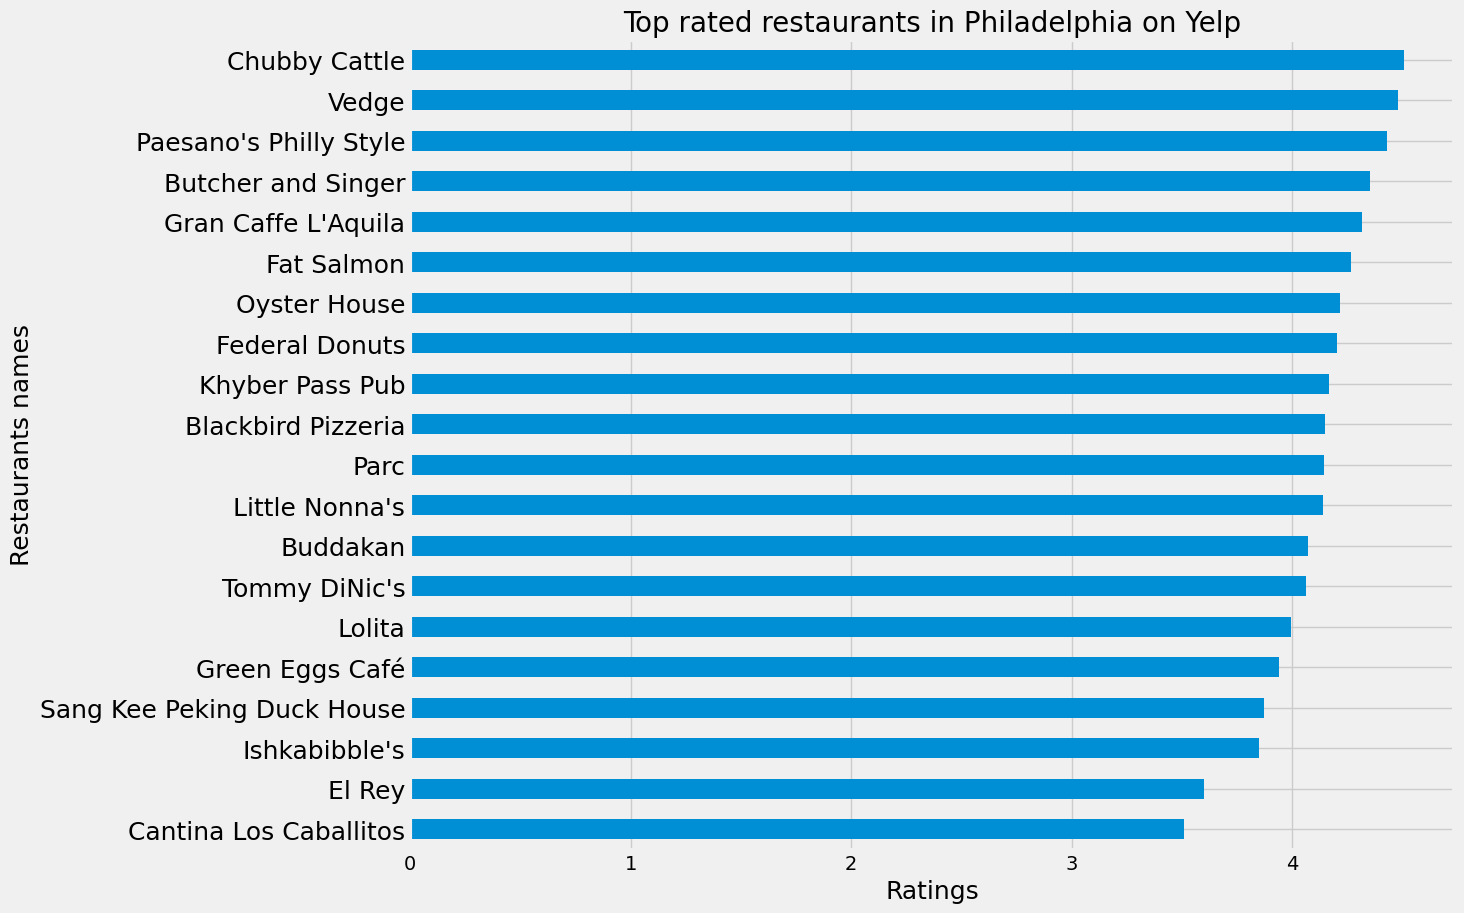

In [14]:
# take city as input
city = input("Enter city name: ")

# create a new column in df_yelp_review that holds business name
df_yelp_review['name'] = df_yelp_review['business_id'].map(df_yelp_business_restaurants.set_index('business_id')['name'])

# filter df_yelp_review to only include reviews for restaurants in the specified city
df_yelp_review_city = df_yelp_review.loc[df_yelp_review['business_id'].isin(df_yelp_business_restaurants.loc[df_yelp_business_restaurants['city'] == city, 'business_id'])]
# take the top 20 most reviewed restaurants for analysis
top_restaurants = df_yelp_review_city.name.value_counts().index[:20].tolist()

# filter df_yelp_review_city to only include reviews for the top 20 restaurants
df_review_top = df_yelp_review_city.loc[df_yelp_review_city['name'].isin(top_restaurants)]

# group by restaurant name and calculate the mean rating, then sort values in ascending order 
top_restaurants_by_rating = df_review_top.groupby('name')['stars'].mean().sort_values(ascending=True)

# plot the graph
top_restaurants_by_rating.plot(kind='barh',figsize=(12, 10))

# set y ticks font size to 18 for easy readability purposes.
plt.yticks(fontsize=18)

# set the title of the graph
plt.title(f'Top rated restaurants in {city} on Yelp',fontsize=20)

# set y label of the graph and change fontsize to 18 for readability purposes. 
plt.ylabel('Restaurants names', fontsize=18)

# set x label to 'Ratings'
plt.xlabel('Ratings', fontsize=18)

# finally show the graph in a new window. 
plt.show()

In [15]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [16]:
def preprocess(x):
    x = re.sub('[^a-z\s]', '', x.lower())                  # get rid of noise
    x = [w for w in x.split() if w not in set(stopwords)]  # remove stopwords
    return ' '.join(x) # then join the text again
# let's find out which stopwords need to remove. We'll use english stopwords.
i = nltk.corpus.stopwords.words('english')
# punctuations to remove
j = list(string.punctuation)
# finally let's combine all of these
stopwords = set(i).union(j)
df_review_top['text_clear'] = df_review_top['text'].apply(preprocess)

def sentiment(x):
    sentiment = TextBlob(x)
    return sentiment.sentiment.polarity

df_review_top['senti_polarity'] = df_review_top['text_clear'].apply(sentiment)

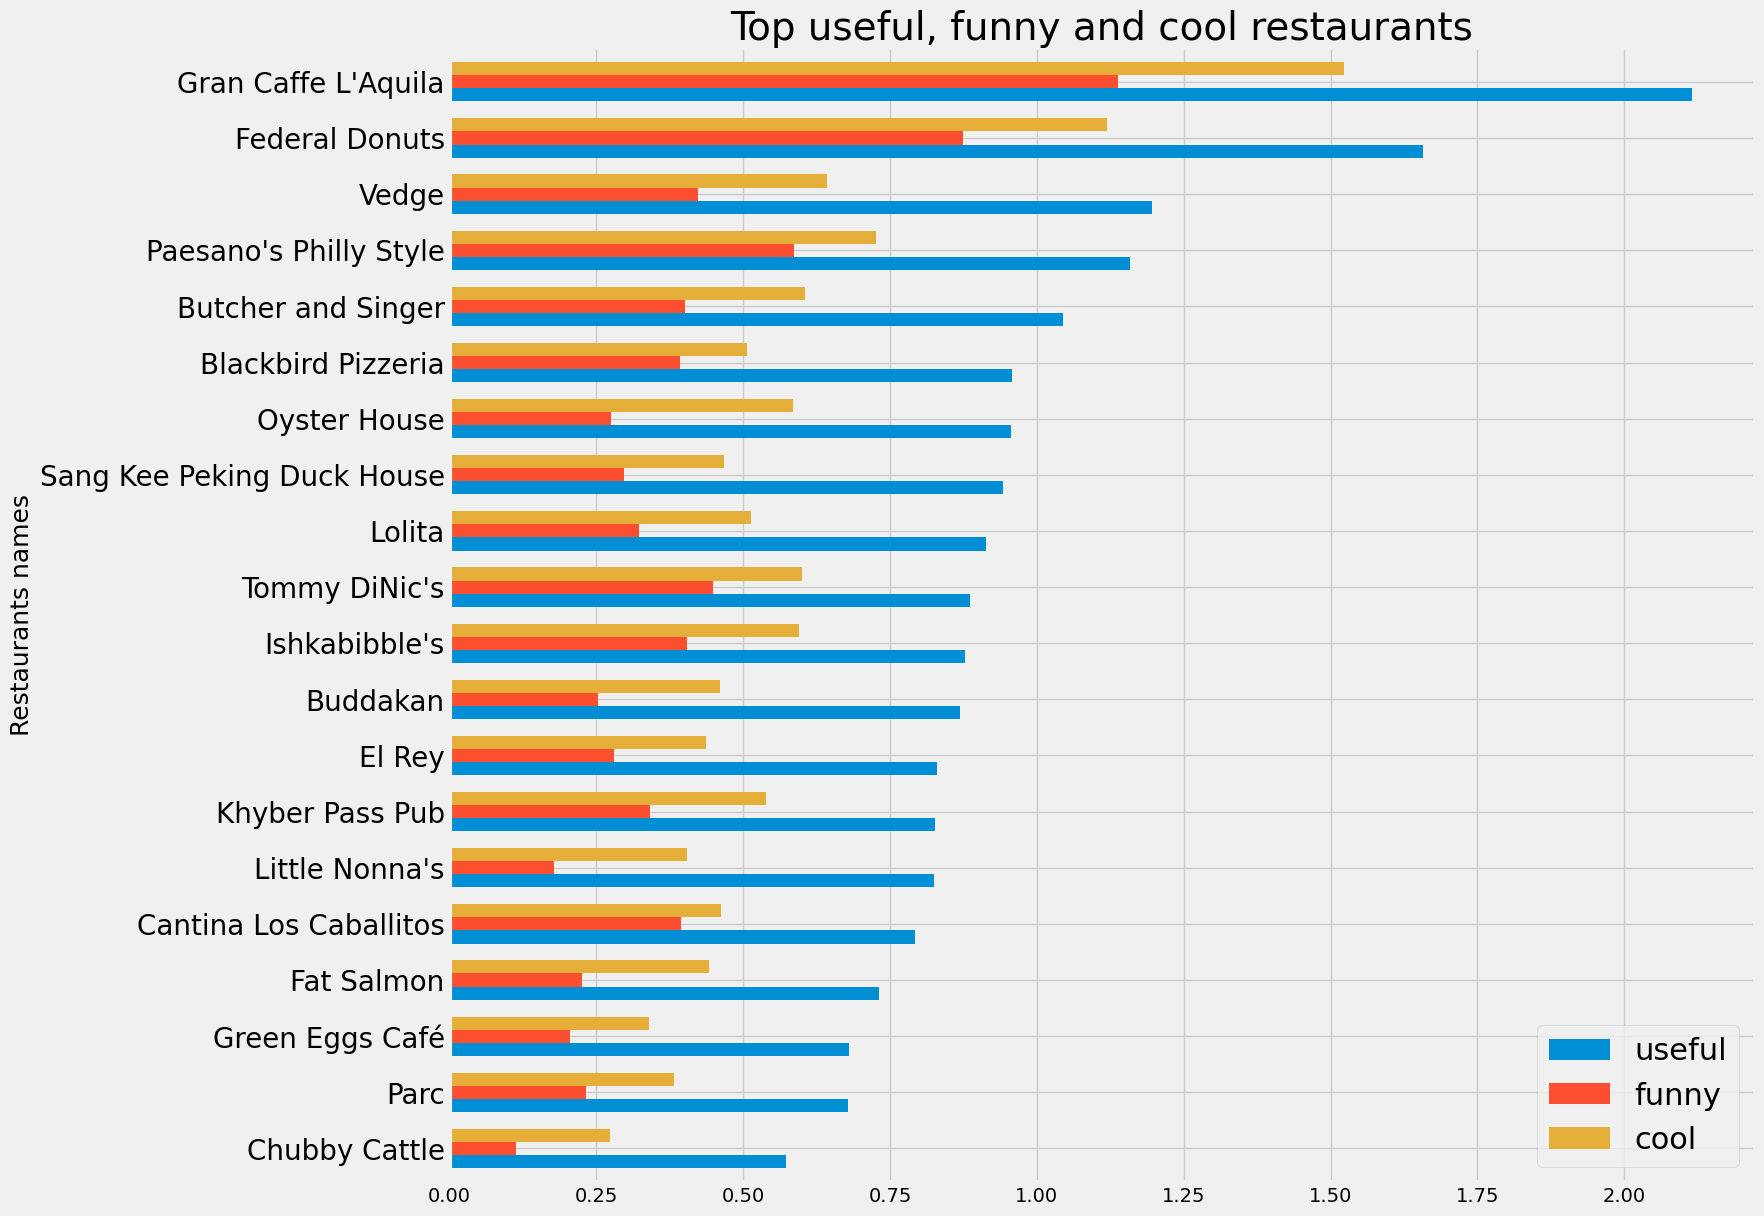

In [17]:
# now we take the name column and count mean of 'useful','funny', 'cool' of each unique business name (I am using pandas groupby function for this. If you don't know what pandas groupby function does, please search on Google)
# then sort values in ascending order 
# then plot the graph
df_review_top.groupby(df_review_top.name)[['useful','funny', 'cool']].mean().sort_values('useful',ascending=True).plot(kind='barh', figsize=(15, 14),width=0.7)
# set y ticks font size to 18 for easy readable purposes.
plt.yticks(fontsize=18)
# set the title of the graph
plt.title('Top useful, funny and cool restaurants',fontsize=28)
# set y label of the graph and change fontsize to 18 for readablity purposes.
plt.ylabel('Restaurants names', fontsize=18)
# set the y ticks
plt.yticks(fontsize=20)
plt.legend(fontsize=22)
# finally show the plot
plt.show()

In [18]:
# function for pre-processing the text of reviews
# this function remove punctuation and stopwords
def preprocess(x):
    x = re.sub('[^a-z\s]', '', x.lower())                  # get rid of noise
    x = [w for w in x.split() if w not in set(stopwords)]  # remove stopwords
    return ' '.join(x) # then join the text again
# let's find out which stopwords need to remove. We'll use english stopwords.
i = nltk.corpus.stopwords.words('english')
# punctuations to remove
j = list(string.punctuation)
# finally let's combine all of these
stopwords = set(i).union(j)

# df_yelp_tip dataset has business id but don't have businesss name.
# But df_yelp_business_restaurants have business name and business id.
# So I take the df_yelp_tip business_id and match with df_yelp_business_restaurants business id.
# And take the business name from df_yelp_business_restaurants and create a new column in df_yelp_tip that holds business name
df_yelp_tip['name'] = df_yelp_tip['business_id'].map(df_yelp_business_restaurants.set_index('business_id')['name'])
# create a new dataframe called 'df_yelp_tip_top' that only contains the reviews of 'top_restaurants'
df_yelp_tip_top = df_yelp_tip.loc[df_yelp_tip['name'].isin(top_restaurants)]
# pre process the text
df_yelp_tip_top['text_clear'] = df_yelp_tip_top['text'].apply(preprocess)

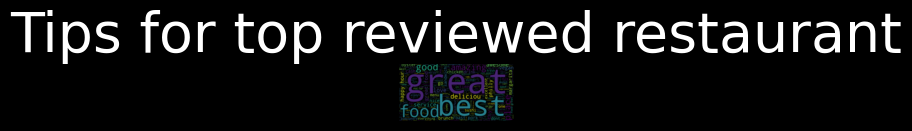

In [19]:
# define wordcloud function from wordcloud library. set some parameteres for beatuful plotting
wc = WordCloud(width=1600, height=800, random_state=1, max_words=200000000)
# generate word cloud using df_yelp_tip_top['text_clear']
wc.generate(str(df_yelp_tip_top['text_clear']))
# declare our figure 
plt.figure(figsize=(20,10), facecolor='k')
# add title to the graph
plt.title("Tips for top reviewed restaurant", fontsize=40,color='white')
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
# after lot of congiguration finally plot the graph
plt.show()

Analyze each restaurant

In [20]:
df_yelp_business_restaurants.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,hours,attributes_ByAppointmentOnly,attributes_BusinessAcceptsCreditCards,hours_Monday,hours_Tuesday,hours_Wednesday,hours_Thursday,hours_Friday,hours_Saturday,attributes_BikeParking,attributes_RestaurantsPriceRange2,attributes_CoatCheck,attributes_RestaurantsTakeOut,attributes_RestaurantsDelivery,attributes_Caters,attributes_WiFi,attributes_BusinessParking,attributes_WheelchairAccessible,attributes_HappyHour,attributes_OutdoorSeating,attributes_HasTV,attributes_RestaurantsReservations,attributes_DogsAllowed,hours_Sunday,attributes_Alcohol,attributes_GoodForKids,attributes_RestaurantsAttire,attributes_Ambience,attributes_RestaurantsTableService,attributes_RestaurantsGoodForGroups,attributes_DriveThru,attributes,attributes_NoiseLevel,attributes_GoodForMeal,attributes_BusinessAcceptsBitcoin,attributes_Smoking,attributes_Music,attributes_GoodForDancing,attributes_AcceptsInsurance,attributes_BestNights,attributes_BYOB,attributes_Corkage,attributes_BYOBCorkage,attributes_HairSpecializesIn,attributes_Open24Hours,attributes_RestaurantsCounterService,attributes_AgesAllowed,attributes_DietaryRestrictions,category_1,category_2,category_3
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,NaN,False,False,7:0-20:0,7:0-20:0,7:0-20:0,7:0-20:0,7:0-21:0,7:0-21:0,True,1,NaN,True,False,True,u'free',"{'garage': False, 'street': True, 'validated':...",NaN,NaN,False,NaN,NaN,NaN,7:0-21:0,u'none',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Restaurants,Food,Bubble Tea
23,9OG5YkX1g2GReZM0AskizA,Romano's Macaroni Grill,5505 S Virginia St,Reno,NV,89502,39.476117,-119.789339,2.5,339,1,NaN,NaN,True,11:0-22:0,11:0-22:0,10:0-22:0,11:0-20:0,11:0-21:0,12:0-21:0,True,2,NaN,True,True,True,u'free',"{'garage': False, 'street': False, 'validated'...",NaN,True,True,True,True,False,11:0-21:0,'full_bar',True,'casual',"{u'divey': False, u'hipster': False, u'casual'...",True,True,NaN,NaN,u'average',"{'dessert': None, 'latenight': False, 'lunch':...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Restaurants,Italian,None
27,tMkwHmWFUEXrC9ZduonpTg,The Green Pheasant,215 1st Ave S,Nashville,TN,37201,36.159886,-86.773197,4.0,161,0,NaN,NaN,True,NaN,NaN,16:0-22:0,16:0-22:0,16:0-23:0,16:0-23:0,False,NaN,NaN,None,None,True,u'free',"{'garage': True, 'street': False, 'validated':...",True,True,False,False,True,False,NaN,u'full_bar',False,u'casual',"{'touristy': False, 'hipster': False, 'romanti...",True,True,NaN,NaN,u'average',"{'dessert': None, 'latenight': None, 'lunch': ...",False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Restaurants,Japanese,Seafood
36,2xVsWBNFwZOxIOdd9Mwnww,Cheeseburger In Paradise,116 N Pottstown Pike,Exton,PA,19341,40.029962,-75.630607,2.5,20,0,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,True,False,NaN,u'free',"{'garage': False, 'street': False, 'validated'...",NaN,True,True,True,NaN,NaN,NaN,u'full_bar',True,u'casual',"{'romantic': False, 'intimate': False, 'touris...",NaN,True,NaN,NaN,u'average',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Restaurants,Burgers,None
41,ljxNT9p0y7YMPx0fcNBGig,Tony's Restaurant & 3rd Street Cafe,312 Piasa St,Alton,IL,62002,38.896563,-90.186203,3.0,94,1,NaN,NaN,True,0:0-0:0,16:0-21:30,16:0-21:30,16:0-21:30,16:0-22:0,16:0-22:0,True,2,NaN,True,False,True,'free',"{'garage': False, 'street': True, 'validated':...",True,True,True,True,True,NaN,16:0-21:30,u'full_bar',True,u'casual',"{'touristy': False, 'hipster': False, 'romanti...",True,True,NaN,NaN,u'average',"{'dessert': False, 'latenight': False, 'lunch'...",False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Restaurants,Specialty Food,Steakhouses


In [21]:
resturant_name = input("Enter your value: ")
df_for_individual_resturant = df_yelp_business_restaurants.loc[df_yelp_business_restaurants['name'] == resturant_name]
restaurant_address = df_for_individual_resturant.iloc[0]['address']
restaurant_city = df_for_individual_resturant.iloc[0]['city']
restaurant_state = df_for_individual_resturant.iloc[0]['state']
restaurant_postal_code = df_for_individual_resturant.iloc[0]['postal_code']
restaurant_business_id = df_for_individual_resturant.iloc[0]['business_id']
df_for_individual_resturant = df_yelp_review.loc[df_yelp_review['business_id'].isin(df_for_individual_resturant.business_id)]
# clear the text
df_for_individual_resturant['text_clear'] = df_for_individual_resturant['text'].apply(preprocess)

Enter your value: Outback Steakhouse


In [22]:
print('Restaurant Name:', resturant_name)
print('Address:', restaurant_address)
print('Business ID:', restaurant_business_id)

Restaurant Name: Outback Steakhouse
Address: 3454 W 86th St
Business ID: -eLCHvtz99fc985UNL1rTA


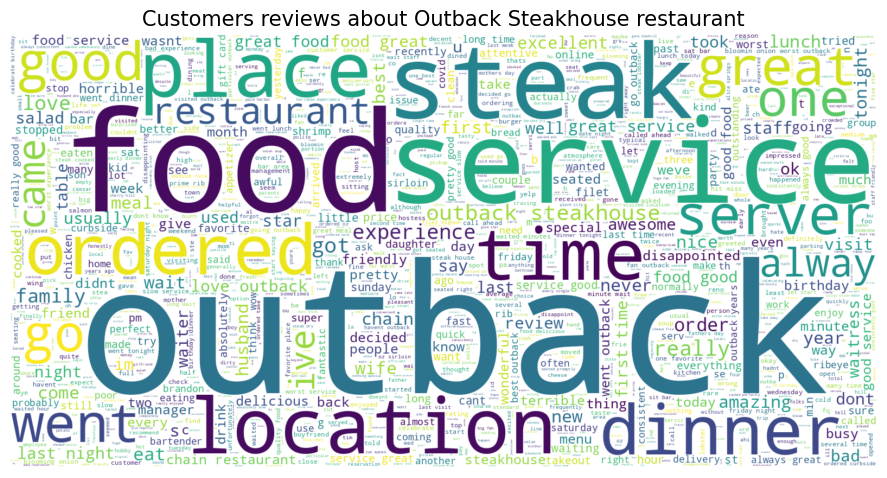

In [32]:
# define wordcloud function from wordcloud library. set some parameteres for beatuful plotting
wc = WordCloud(background_color='white', width=1600, height=800, random_state=1, max_words=200000000)
# generate word cloud
wc.generate(str(df_for_individual_resturant['text_clear']))
plt.figure(figsize=(10,5), facecolor='white')
# add title to the graph
plt.title("Customers reviews about %s restaurant"% (resturant_name), fontsize=15,color='black')
plt.imshow(wc, interpolation='bilinear')
plt.axis("Off")
plt.tight_layout()
# after lot of configuration finally plot the graph
tmpfile1 = BytesIO()
plt.savefig(tmpfile1, format='png')
encoded1 = base64.b64encode(tmpfile1.getvalue()).decode('utf-8')
plt.show()

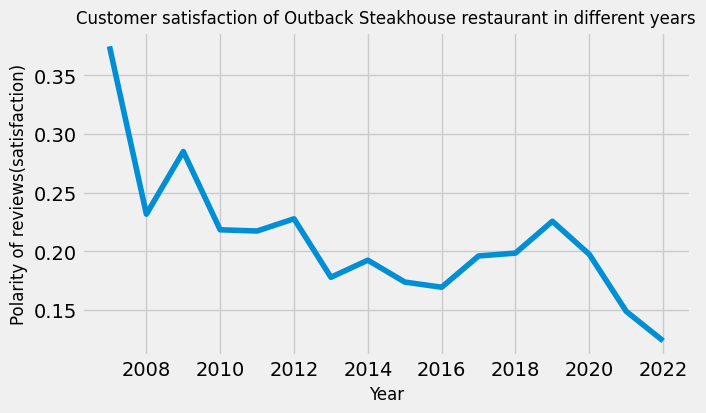

In [24]:
df_for_individual_resturant['senti_polarity'] = df_for_individual_resturant['text_clear'].apply(sentiment)
# convert date column to pandas datatime 
df_for_individual_resturant.date = pd.to_datetime(df_for_individual_resturant.date)
# now we take the date column as base and count mean of stars of each unique date year (I am using pandas groupby function for this. If you don't know what pandas groupby function does, please search on Google)
# then plot the graph
df_for_individual_resturant.groupby(df_for_individual_resturant.date.dt.year)['senti_polarity'].mean().plot(kind='line', figsize=(7, 4))
# set the title of graph
plt.title("Customer satisfaction of %s restaurant in different years"% (resturant_name), fontsize=12)
# set xlabel
plt.xlabel('Year', fontsize=12)
# set ylabel
plt.ylabel('Polarity of reviews(satisfaction)', fontsize=12)
# finally show the plot
tmpfile2 = BytesIO()
plt.savefig(tmpfile2, format='png', bbox_inches='tight')
encoded2 = base64.b64encode(tmpfile2.getvalue()).decode('utf-8')
plt.show()

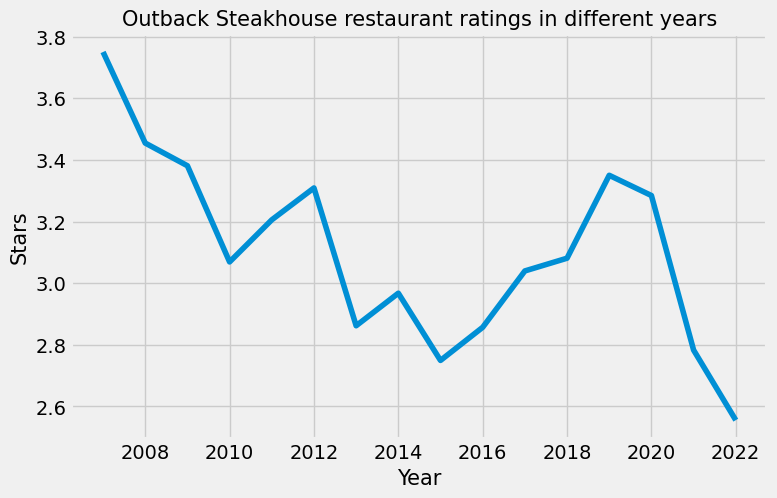

In [28]:
# convert date column to pandas datatime 
df_for_individual_resturant.date = pd.to_datetime(df_for_individual_resturant.date)
# now we take the date column as base and count mean of stars of each unique date year (I am using pandas groupby function for this. If you don't know what pandas groupby function does, please search on Google)
# then plot the graph
df_for_individual_resturant.groupby(df_for_individual_resturant.date.dt.year)['stars'].mean().plot(kind='line', figsize=(8, 5))
# set the title of graph
plt.title("%s restaurant ratings in different years"% (resturant_name), fontsize=15)
# set xlabel
plt.xlabel('Year', fontsize=15)
# set ylabel
plt.ylabel('Stars', fontsize=15)
# finally show the plot
tmpfile3 = BytesIO()
plt.savefig(tmpfile3, format='png', bbox_inches='tight')
encoded3 = base64.b64encode(tmpfile3.getvalue()).decode('utf-8')
plt.show()

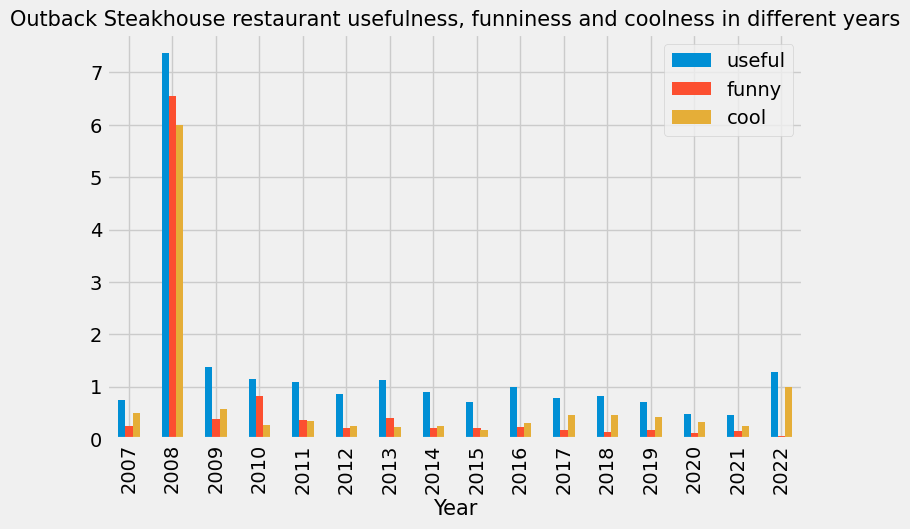

In [29]:
# convert date column to pandas datatime 
df_for_individual_resturant.date = pd.to_datetime(df_for_individual_resturant.date)
# now we take the date column as base and count mean of 'useful','funny','cool' of each unique date year (I am using pandas groupby function for this. If you don't know what pandas groupby function does, please search on Google)
# then plot the graph
df_for_individual_resturant.groupby(df_for_individual_resturant.date.dt.year)[['useful','funny','cool']].mean().plot(kind='bar', figsize=(8, 5))
# set the title of graph
plt.title("%s restaurant usefulness, funniness and coolness in different years"% (resturant_name), fontsize=15)
# add xlabel
plt.xlabel('Year', fontsize=15)
# finally show the plot
tmpfile4 = BytesIO()
plt.savefig(tmpfile4, format='png', bbox_inches='tight')
encoded4 = base64.b64encode(tmpfile4.getvalue()).decode('utf-8')
plt.show()

Delete unwated things once executed

In [30]:
import plotly.io as pio

page_title_text="Yelp Report"

# generate the plotly HTML code for the figure
figure_html = pio.to_html(fig, full_html=False)

html = f'''
    <html>
        <head>
            <title>{page_title_text}</title>
        </head>
        <body>
        <h1>{page_title_text}</h1>
        <p>{"&emsp;Restaurant Name: %s"%(resturant_name)}</p>
        <p>{"&emsp;Business ID: %s" %(restaurant_business_id)}</p>
        <p>{"&emsp;Address: %s" %(restaurant_address)}</p>
        <p>{"&emsp;City: %s" %(restaurant_city)}</p>
        <p>{"&emsp;State: %s" %(restaurant_state)}</p>
        <p>{"&emsp;Postal code: %s" %(restaurant_postal_code)}</p>
        {figure_html}
        <img style='padding: 20px 20px 20px 20px;' src=\'data:image/png;base64,{encoded1}\'>
        <img style='padding: 20px 20px 20px 20px;' src=\'data:image/png;base64,{encoded2}\'>
        <img style='padding: 20px 20px 20px 20px;' src=\'data:image/png;base64,{encoded3}\'>
        <img style='padding: 20px 20px 20px 20px;' src=\'data:image/png;base64,{encoded4}\'>
        </body>
    </html>
    '''

with open('test.html','w') as f:
    f.write(html)


In [ ]:
# !pip install reportlab

In [ ]:
# from reportlab.lib.pagesizes import letter
# from reportlab.pdfgen import canvas
# from PIL import Image

# # create a new PDF document
# pdf_filename = 'analysis_report.pdf'
# pdf_canvas = canvas.Canvas(pdf_filename, pagesize=letter)
# y = 780
# if y<36:
#   pdf_canvas.showPage()
#   # add a title to the report
#   pdf_canvas.setFont('Helvetica-Bold', 18)
#   pdf_canvas.drawString(50, 750, 'Analysis Report')

#   pdf_canvas.setFont('Helvetica-Bold', 15)
#   pdf_canvas.drawString(70, 730, "Restaurant Name: %s" %(resturant_name))

#   pdf_canvas.setFont('Helvetica-Bold', 15)
#   pdf_canvas.drawString(70, 710, "Business ID: %s" %(restaurant_business_id))

#   pdf_canvas.setFont('Helvetica-Bold', 15)
#   pdf_canvas.drawString(70, 690, "Address: %s" %(restaurant_address))

#   pdf_canvas.setFont('Helvetica-Bold', 15)
#   pdf_canvas.drawString(70, 670, "City: %s" %(restaurant_city))

#   pdf_canvas.setFont('Helvetica-Bold', 15)
#   pdf_canvas.drawString(70, 650, "State: %s" %(restaurant_state))

#   pdf_canvas.setFont('Helvetica-Bold', 15)
#   pdf_canvas.drawString(70, 630, "Postal code: %s" %(restaurant_postal_code))

#   # add a section for the first graph
#   pdf_canvas.setFont('Helvetica-Bold', 15)
#   pdf_canvas.drawString(50, 600, 'Word Cloud')
#   im = Image.open("word_cloud.png")
#   pdf_canvas.drawInlineImage(im, 50, 590 - 250, width=500, height=250)
#   # pdf_canvas.drawString(50, 450, 'Description of the graph')

#   # add a section for the second graph
#   # pdf_canvas.setFont('Helvetica-Bold', 16)
#   # pdf_canvas.drawString(50, 400, 'Graph 2: Title of the Graph')
#   im = Image.open("customer_satifaction.png")
#   pdf_canvas.drawInlineImage(im, 50, 330 - 250, width=500, height=250)
#   # pdf_canvas.drawString(50, 150, 'Description of the graph')

#   # # add a section for the third graph
#   # # pdf_canvas.setFont('Helvetica-Bold', 16)
#   # # pdf_canvas.drawString(50, 100, 'Graph 3: Title of the Graph')
#   # pdf_canvas.drawImage('restaurant_ratings.png', 50, 0, width=500, height=300)
#   # # pdf_canvas.drawString(50, -50, 'Description of the graph')

#   # pdf_canvas.drawImage('restaurant_usefullness.png', 50, 0, width=500, height=300)

# # save and close the PDF document
# pdf_canvas.save()
